In [0]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.tree import DecisionTreeClassifier

sns.set(style="whitegrid")

# 1. Importando os dados


In [0]:
# Ler dados de um CSV e coloca em um dataframe

df = pd.read_csv("https://raw.githubusercontent.com/widsrecife/dados/master/Sessao_1/Attribute%20DataSet.csv")

![Anatomia de um Dataframe, fonte: https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c](https://miro.medium.com/max/2516/1*ZSehcrMtBWN7_qCWq_HiSg.png)
Anatomia de um Dataframe, fonte: https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c

## 2. Vendo as primeiras linhas dos dados

In [0]:
df.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


## 3. Listando as colunas dos dados

In [0]:
df.columns

Index(['Dress_ID', 'Style', 'Price', 'Rating', 'Size', 'Season', 'NeckLine',
       'SleeveLength', 'waiseline', 'Material', 'FabricType', 'Decoration',
       'Pattern Type', 'Recommendation'],
      dtype='object')

## 4. Que colunas são úteis para prever a estação do ano que o vestido deve ser utilizado?

In [0]:
# O pandas tem várias formas de selecionar linhas e colundas ([], .loc, .iloc)
#   aqui vamos usar o [] (indexing operator) onde a gente passa uma lista com as colunas que queremos selecionar

df_colunas_utilizadas = df[["Style","NeckLine","SleeveLength","Material","FabricType","Decoration"]]

In [0]:
df_colunas_utilizadas.head()

,Style,NeckLine,SleeveLength,Material,FabricType,Decoration
0,Sexy,o-neck,sleevless,NaN,chiffon,ruffles
1,Casual,o-neck,Petal,microfiber,NaN,ruffles
2,vintage,o-neck,full,polyster,NaN,NaN
3,Brief,o-neck,full,silk,chiffon,embroidary
4,cute,o-neck,butterfly,chiffonfabric,chiffon,bow


## 5. Separando a coluna de rótulos

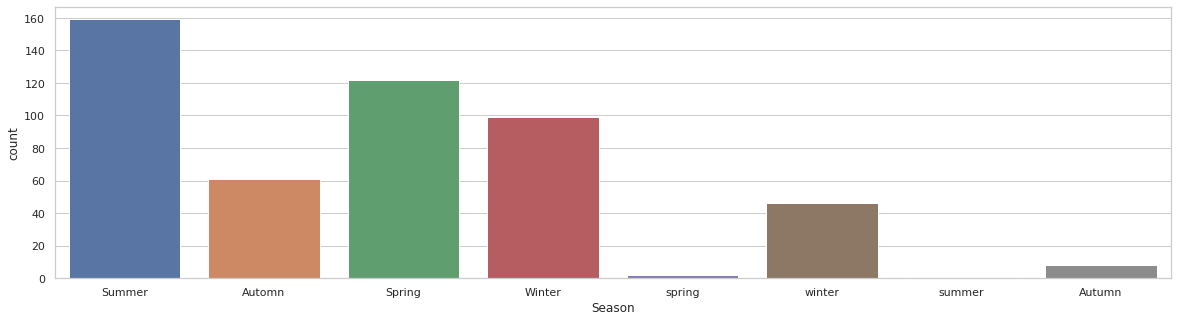

In [0]:
# Aqui a gente vai usar o seaborn para mostrar os gráficos
#   https://seaborn.pydata.org/
#   a biblioteca tem várias gráficos prontos: https://seaborn.pydata.org/tutorial/categorical.html

plt.figure(figsize=(20,5))
sns.countplot(x="Season", data=df)

In [0]:
# No pandas a gente pode selecionar uma coluna, aplicar uma função e salvar o resultado em uma nuva coluna;
#   para aplicar a função usamos a função apply()

def string_para_minusculo(valor):
    return str(valor).lower()

df["season_minusculo"] = df["Season"].apply(string_para_minusculo)

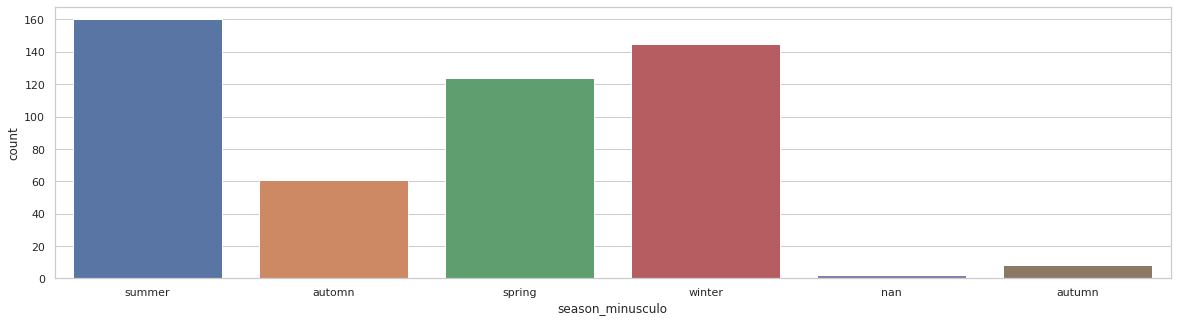

In [0]:
plt.figure(figsize=(20,5))
sns.countplot(x="season_minusculo", data=df)

In [0]:
# Também podemos substituir determinados valores usando a função replace()

df["season_minusculo"] = df["season_minusculo"].replace({"autumn":"automn"})

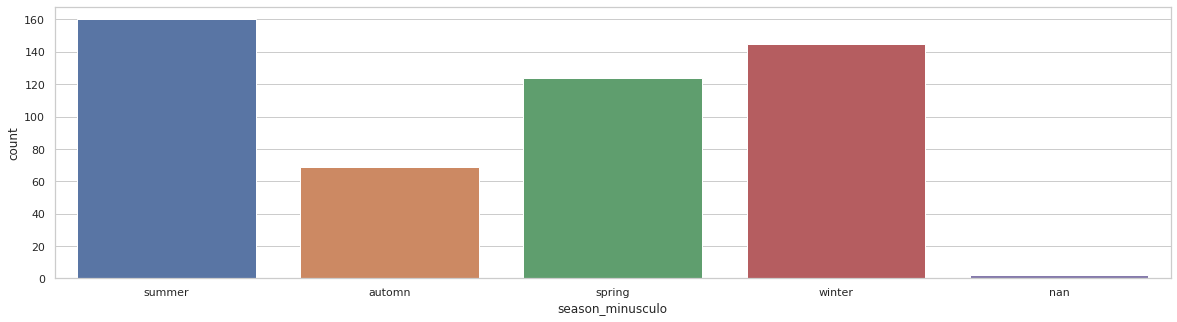

In [0]:
plt.figure(figsize=(20,5))
sns.countplot(x="season_minusculo", data=df)

In [0]:
rotulos_string = df["season_minusculo"]

In [0]:
rotulos_string.head()

0    summer
1    summer
2    automn
3    spring
4    summer
Name: season_minusculo, dtype: object

In [0]:
# Nossa coluna de rótulos (labels em Inglês) tem Strings, mas precisamos que sejam números para usar os algoritmos
#   do scikit-learn
# Vamos converter as strings para números usando a classe LabelEncoder() do scikit-learn
#   Essa função transformar cada string em uma classe de 0 n_classes-1
#   Exemplo: ["vermelho","azul","azul"] se torna [0,1,1]

rotulos_encoder = preprocessing.LabelEncoder()

# Instanciamos a classe LabelEncoder() acima, mas para transformar os dados precisamos que a classe:
#   1. aprenda qual vai ser o número de cada string: método fit()
#   2. transforme os dados em números: método transform
rotulos_encoder.fit(rotulos_string)

rotulos = rotulos_encoder.transform(rotulos_string)

In [0]:
rotulos

array([3, 3, 0, 2, 3, 3, 3, 0, 2, 3, 3, 2, 4, 3, 3, 4, 2, 0, 4, 0, 0, 3,
       3, 3, 0, 0, 2, 3, 0, 2, 0, 2, 0, 2, 2, 4, 4, 0, 4, 2, 2, 0, 4, 2,
       4, 4, 2, 3, 3, 4, 3, 3, 2, 0, 2, 4, 4, 0, 3, 0, 2, 2, 3, 2, 0, 0,
       3, 4, 3, 0, 3, 2, 4, 2, 0, 2, 4, 2, 2, 4, 3, 2, 2, 3, 4, 3, 0, 0,
       0, 4, 2, 4, 4, 2, 2, 2, 2, 4, 3, 3, 3, 3, 4, 3, 4, 3, 2, 0, 2, 0,
       0, 4, 0, 0, 2, 4, 2, 0, 0, 4, 4, 3, 2, 4, 2, 3, 0, 3, 0, 2, 3, 4,
       2, 4, 0, 4, 4, 0, 0, 3, 0, 3, 2, 0, 2, 3, 3, 4, 4, 3, 3, 4, 3, 3,
       2, 0, 2, 4, 3, 2, 4, 2, 0, 4, 2, 4, 4, 3, 2, 4, 4, 3, 3, 4, 0, 4,
       4, 2, 0, 3, 3, 4, 2, 4, 4, 4, 1, 2, 0, 2, 2, 3, 3, 3, 4, 4, 3, 3,
       4, 4, 3, 0, 0, 3, 3, 3, 0, 3, 3, 4, 2, 4, 3, 4, 2, 0, 0, 3, 4, 2,
       0, 2, 3, 3, 4, 4, 3, 0, 3, 0, 4, 4, 2, 4, 2, 0, 2, 4, 3, 4, 4, 4,
       4, 4, 4, 3, 2, 3, 3, 4, 3, 3, 2, 0, 4, 4, 4, 2, 4, 2, 4, 4, 4, 3,
       2, 4, 2, 2, 4, 2, 1, 4, 2, 2, 4, 3, 4, 4, 3, 4, 4, 2, 2, 3, 3, 4,
       2, 2, 2, 2, 2, 4, 4, 2, 3, 2, 2, 2, 3, 4, 4,

# 6. Separando os dados em treinamento e teste

In [0]:
# O scikit-learn possui uma função chamada train_test_split() que divide um conjunto de dados em conjunto de treinamento
#   e conjunto de testes. Isso é importante porque sem o conjunto de testes a gente não vão poder avaliar se um modelo
#   apresenta bons resultados ou não
# Vamos usar o paramêtro stratify para que os dois conjuntos tenham a mesma proporção de classes

dados_treinamento, dados_teste, rotulos_treinamento, rotulos_teste = train_test_split(df_colunas_utilizadas,
                                                                                      rotulos,
                                                                                      stratify=rotulos,
                                                                                      test_size=0.33,
                                                                                      random_state=42)

In [0]:
type(dados_treinamento)

pandas.core.frame.DataFrame

In [0]:
dados_treinamento.head()

,Style,NeckLine,SleeveLength,Material,FabricType,Decoration
342,Casual,o-neck,sleevless,cotton,chiffon,hollowout
12,sexy,o-neck,threequarter,NaN,chiffon,lace
51,Casual,o-neck,sleevless,milksilk,NaN,NaN
130,Casual,v-neck,full,acrylic,NaN,lace
217,Casual,o-neck,full,cotton,worsted,lace


In [0]:
dados_treinamento.shape

(335, 6)

In [0]:
df_colunas_utilizadas.shape

(500, 6)

## 7. Visualizando os dados

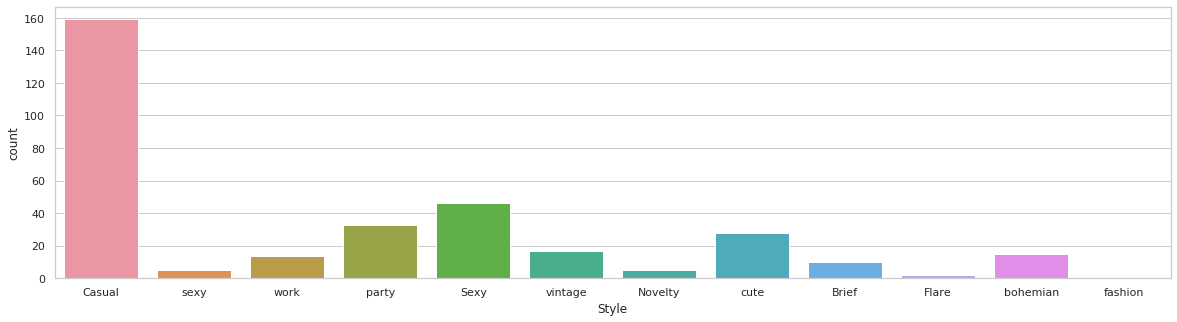

In [0]:
plt.figure(figsize=(20,5))
sns.countplot(x="Style", data=dados_treinamento)

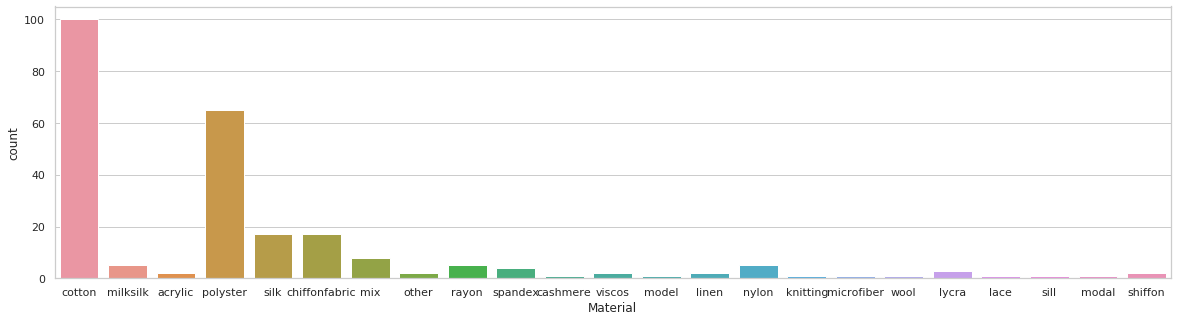

In [0]:
plt.figure(figsize=(20,5))
sns.countplot(x="Material", data=dados_treinamento)

## 8. Mudando os tipos dos dados

In [0]:
dados_treinamento.dtypes

Style           object
NeckLine        object
SleeveLength    object
Material        object
FabricType      object
Decoration      object
dtype: object

In [0]:
dados_treinamento.head()

,Style,NeckLine,SleeveLength,Material,FabricType,Decoration
342,Casual,o-neck,sleevless,cotton,chiffon,hollowout
12,sexy,o-neck,threequarter,NaN,chiffon,lace
51,Casual,o-neck,sleevless,milksilk,NaN,NaN
130,Casual,v-neck,full,acrylic,NaN,lace
217,Casual,o-neck,full,cotton,worsted,lace


In [0]:
# Novamente os dados estão no tipo string e precisamos que eles sejam números
#   a classe LabelEncoder() só deve ser usada em uma coluna única [classe]
#   para converter strings de várias colunas utilizamos a classe OrdinalEncoder() do scikit-learn
#   A ideia é a mesma: aprender qual o número de cada string [fit()] e depois transformar [transform()]

ordinal_encoder = OrdinalEncoder()

ordinal_encoder.fit(dados_treinamento)

ValueError: ignored

In [0]:
# Para usar o OrdinalEncoder() os dados não podem ter valores faltantes (missing values em Inglês)
#   então preenchemos os valores faltantes com a string "-1"

dados_treinamento_sem_valores_faltantes = dados_treinamento.fillna("-1")

In [0]:
dados_treinamento_sem_valores_faltantes.head()

,Style,NeckLine,SleeveLength,Material,FabricType,Decoration
342,Casual,o-neck,sleevless,cotton,chiffon,hollowout
12,sexy,o-neck,threequarter,-1,chiffon,lace
51,Casual,o-neck,sleevless,milksilk,-1,-1
130,Casual,v-neck,full,acrylic,-1,lace
217,Casual,o-neck,full,cotton,worsted,lace


In [0]:
ordinal_encoder.fit(dados_treinamento_sem_valores_faltantes)

dados_treinamento_transformados = ordinal_encoder.transform(dados_treinamento_sem_valores_faltantes)

In [0]:
ordinal_encoder.categories_

[array(['Brief', 'Casual', 'Flare', 'Novelty', 'Sexy', 'bohemian', 'cute',
        'fashion', 'party', 'sexy', 'vintage', 'work'], dtype=object),
 array(['-1', 'Scoop', 'Sweetheart', 'backless', 'boat-neck', 'bowneck',
        'halter', 'o-neck', 'open', 'peterpan-collor', 'ruffled',
        'slash-neck', 'sqare-collor', 'sweetheart', 'turndowncollor',
        'v-neck'], dtype=object),
 array(['-1', 'cap-sleeves', 'capsleeves', 'full', 'half', 'halfsleeve',
        'short', 'sleeevless', 'sleeveless', 'sleevless', 'sleveless',
        'threequarter', 'threequater', 'thressqatar', 'turndowncollor'],
       dtype=object),
 array(['-1', 'acrylic', 'cashmere', 'chiffonfabric', 'cotton', 'knitting',
        'lace', 'linen', 'lycra', 'microfiber', 'milksilk', 'mix', 'modal',
        'model', 'nylon', 'other', 'polyster', 'rayon', 'shiffon', 'silk',
        'sill', 'spandex', 'viscos', 'wool'], dtype=object),
 array(['-1', 'batik', 'broadcloth', 'chiffon', 'dobby', 'flannael',
        'jersey

In [0]:
# Os dados nos dois formatos possuem o mesmo número de linhas e de colunas
print(dados_treinamento_transformados.shape)
print(dados_treinamento.shape)

(335, 6)
(335, 6)


In [0]:
# Mas agora dados_treinamento_transformados possui inteiros e não strings
dados_treinamento_transformados

array([[ 1.,  7.,  9.,  4.,  3., 12.],
       [ 9.,  7., 11.,  0.,  3., 13.],
       [ 1.,  7.,  9., 10.,  0.,  0.],
       ...,
       [ 8., 15., 12.,  8., 12.,  2.],
       [ 6., 15.,  9.,  3.,  3.,  0.],
       [ 1.,  7.,  9.,  3.,  3., 23.]])

## 9. Escolhendo duas variáveis para treinar o modelo

In [0]:
# A gente pode escolher as features com mais poder preditivo
#   Vamos usar a classe SelectKBest do scikit-learn para fazer isso

seletor_de_features = SelectKBest(chi2, k=2)
dados_treinamento_duas_features = seletor_de_features.fit_transform(dados_treinamento_transformados, rotulos_treinamento)

In [0]:
print("Features selecionadas:",dados_treinamento.columns[seletor_de_features.get_support()].values)

Features selecionadas: ['Material' 'Decoration']


In [0]:
dados_treinamento_duas_features.shape

(335, 2)

## 10. Treinando o modelo

In [0]:
clf = DecisionTreeClassifier()
clf = clf.fit(dados_treinamento_duas_features, rotulos_treinamento)

## 11. Avaliando o modelo

In [0]:
dados_teste_sem_valores_faltantes = dados_teste.fillna("-1")

dados_teste_transformados = enc.fit_transform(dados_teste_sem_valores_faltantes)

dados_teste_duas_features = seletor_de_features.transform(dados_teste_transformados)

clf.score(dados_teste_duas_features,rotulos_teste)

0.3393939393939394